<span style="font-size:2em;">Analyzing the NBA</span>

By

Tragic Bronsons

Kenneth Lai, Peter Asence

<span style="font-size:2em;">Mid Range vs. 3's</span>

In [1]:
#populating array of dataframes


from nba_api.stats.endpoints import shotchartleaguewide
import time
import matplotlib.pyplot as plt
import pandas as pd

i = 1996

shotseasons = []
while i < 2020:
    season = str(i) + "-" + str(i+1)[2:]
    shot = shotchartleaguewide.ShotChartLeagueWide(league_id="00", season=season)#goes back to 1996
    shotseasons.append(shot)
    time.sleep(0.5)
    i+=1
  


In [2]:
shotseasons[2].get_data_frames()[0]#up to index 23. 24 in total

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,81,2,0.025
1,League Averages,Above the Break 3,Center(C),24+ ft.,3354,1046,0.312
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,6170,2035,0.330
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,6485,2222,0.343
4,League Averages,Backcourt,Back Court(BC),Back Court Shot,162,4,0.025
5,League Averages,In The Paint (Non-RA),Center(C),Less Than 8 ft.,13222,4721,0.357
6,League Averages,In The Paint (Non-RA),Center(C),8-16 ft.,3140,1248,0.397
7,League Averages,In The Paint (Non-RA),Left Side(L),8-16 ft.,1218,427,0.351
8,League Averages,In The Paint (Non-RA),Right Side(R),8-16 ft.,1195,420,0.351
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,2346,886,0.378


In [3]:
df3pointers = []
dfmidrange = []
debug = 0

year = 1996
for frame in shotseasons:
    df3p = frame.get_data_frames()[0]
    dfmid = frame.get_data_frames()[0]
    df3p = df3p[df3p['SHOT_ZONE_BASIC'].str.contains("3")]
    dfmid = dfmid[dfmid["SHOT_ZONE_BASIC"].str.contains("Mid-Range")]
    df3p["year"] = str(year) + "-" + str(year+1)[2:]
    dfmid["year"] = str(year) + "-" + str(year+1)[2:]
    df3pointers.append(df3p)
    dfmidrange.append(dfmid)
    year+=1
    
df3pointers[8]

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT,year
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,129,5,0.039,2004-05
1,League Averages,Above the Break 3,Center(C),24+ ft.,6275,2171,0.346,2004-05
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,11825,4146,0.351,2004-05
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,11282,3991,0.354,2004-05
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,5951,2239,0.376,2004-05
19,League Averages,Right Corner 3,Right Side(R),24+ ft.,5703,2217,0.389,2004-05


In [4]:
dfmidrange[8]

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT,year
10,League Averages,Mid-Range,Center(C),16-24 ft.,7241,2945,0.407,2004-05
11,League Averages,Mid-Range,Center(C),8-16 ft.,2055,880,0.428,2004-05
12,League Averages,Mid-Range,Left Side Center(LC),16-24 ft.,10567,4286,0.406,2004-05
13,League Averages,Mid-Range,Left Side(L),16-24 ft.,10917,4304,0.394,2004-05
14,League Averages,Mid-Range,Left Side(L),8-16 ft.,11933,4456,0.373,2004-05
15,League Averages,Mid-Range,Right Side Center(RC),16-24 ft.,11133,4455,0.400,2004-05
16,League Averages,Mid-Range,Right Side(R),16-24 ft.,9358,3695,0.395,2004-05
17,League Averages,Mid-Range,Right Side(R),8-16 ft.,11023,4121,0.374,2004-05


In [5]:
for frame in df3pointers:
    frame["Total 3 pointers attempted"] = frame["FGA"].sum()
    frame["Total 3 pointers made"] = frame["FGM"].sum()
    
    
for frame in dfmidrange:
    frame["Total mid range shots attempted"] = frame["FGA"].sum()
    frame["Total mid range shots made"] = frame["FGM"].sum()
    

In [6]:
for frame in df3pointers:
    frame["Total 3 pointers percentage"] = frame["Total 3 pointers made"]/frame["Total 3 pointers attempted"]
    
for frame in dfmidrange:
    frame["Total mid range percentage"] = frame["Total mid range shots made"]/frame["Total mid range shots attempted"]

In [7]:
#df3pointers[5]

dfmidrange[5]

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT,year,Total mid range shots attempted,Total mid range shots made,Total mid range percentage
10,League Averages,Mid-Range,Center(C),8-16 ft.,2163,905,0.418,2001-02,75634,29550,0.390697
11,League Averages,Mid-Range,Center(C),16-24 ft.,6234,2421,0.388,2001-02,75634,29550,0.390697
12,League Averages,Mid-Range,Left Side Center(LC),16-24 ft.,9383,3796,0.405,2001-02,75634,29550,0.390697
13,League Averages,Mid-Range,Left Side(L),16-24 ft.,10864,4280,0.394,2001-02,75634,29550,0.390697
14,League Averages,Mid-Range,Left Side(L),8-16 ft.,14011,5391,0.385,2001-02,75634,29550,0.390697
15,League Averages,Mid-Range,Right Side Center(RC),16-24 ft.,10295,4081,0.396,2001-02,75634,29550,0.390697
16,League Averages,Mid-Range,Right Side(R),8-16 ft.,12513,4657,0.372,2001-02,75634,29550,0.390697
17,League Averages,Mid-Range,Right Side(R),16-24 ft.,10171,4019,0.395,2001-02,75634,29550,0.390697


In [8]:
df3pointers[2]

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT,year,Total 3 pointers attempted,Total 3 pointers made,Total 3 pointers percentage
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,81,2,0.025,1998-99,20689,7014,0.339021
1,League Averages,Above the Break 3,Center(C),24+ ft.,3354,1046,0.312,1998-99,20689,7014,0.339021
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,6170,2035,0.330,1998-99,20689,7014,0.339021
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,6485,2222,0.343,1998-99,20689,7014,0.339021
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,2346,886,0.378,1998-99,20689,7014,0.339021
19,League Averages,Right Corner 3,Right Side(R),24+ ft.,2253,823,0.365,1998-99,20689,7014,0.339021


In [9]:
dftotal3 = pd.concat(df3pointers)
dftotalmid = pd.concat(dfmidrange)

In [10]:
dftotal3 = dftotal3.set_index("year")
dftotalmid = dftotalmid.set_index("year")

In [11]:
dftotalmid

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT,Total mid range shots attempted,Total mid range shots made,Total mid range percentage
year,,,,,,,,,,
1996-97,League Averages,Mid-Range,Center(C),16-24 ft.,7642,3084,0.404,79698,31993,0.401428
1996-97,League Averages,Mid-Range,Center(C),8-16 ft.,1772,748,0.422,79698,31993,0.401428
1996-97,League Averages,Mid-Range,Left Side Center(LC),16-24 ft.,10454,4280,0.409,79698,31993,0.401428
1996-97,League Averages,Mid-Range,Left Side(L),16-24 ft.,10350,4359,0.421,79698,31993,0.401428
1996-97,League Averages,Mid-Range,Left Side(L),8-16 ft.,14559,5685,0.390,79698,31993,0.401428
...,...,...,...,...,...,...,...,...,...,...
2019-20,League Averages,Mid-Range,Left Side(L),16-24 ft.,1675,671,0.401,27112,11017,0.406351
2019-20,League Averages,Mid-Range,Left Side(L),8-16 ft.,4731,1920,0.406,27112,11017,0.406351
2019-20,League Averages,Mid-Range,Right Side Center(RC),16-24 ft.,4123,1676,0.407,27112,11017,0.406351


In [12]:
dftotal3 = dftotal3.filter(["Total 3 pointers attempted", "Total 3 pointers made", "Total 3 pointers percentage"])

dftotal3 = dftotal3.drop_duplicates()

In [13]:
dftotalmid = dftotalmid.filter(["Total mid range shots attempted", "Total mid range shots made", "Total mid range percentage"])

dftotalmid = dftotalmid.drop_duplicates()

In [14]:
df_total_shots = pd.merge(dftotal3, dftotalmid, left_index=True, right_index=True, how='outer')

cols = [0, 3]

df_total_shots





,Total 3 pointers attempted,Total 3 pointers made,Total 3 pointers percentage,Total mid range shots attempted,Total mid range shots made,Total mid range percentage
year,,,,,,
1996-97,21448,7561,0.352527,79698,31993,0.401428
1997-98,31628,11000,0.347793,73521,28615,0.389209
1998-99,20689,7014,0.339021,45678,17364,0.380139
1999-00,34413,12226,0.355273,78892,31090,0.394083
2000-01,34347,12243,0.356450,76947,30054,0.390581
2001-02,37047,13154,0.355062,75634,29550,0.390697
2002-03,37472,13230,0.353064,75728,29223,0.385894
2003-04,37654,13134,0.348808,72162,27500,0.381087
2004-05,41165,14769,0.358776,74227,29142,0.392606


<AxesSubplot:xlabel='year'>

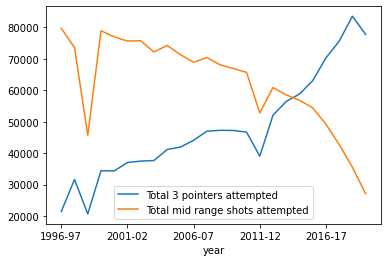

In [15]:
df_total_shots = df_total_shots[df_total_shots.columns[cols]]

df_total_shots.plot.line()

In [16]:
df82_total_shot = df_total_shots.drop(["1998-99", "2011-12", "2019-20"])

<AxesSubplot:xlabel='year'>

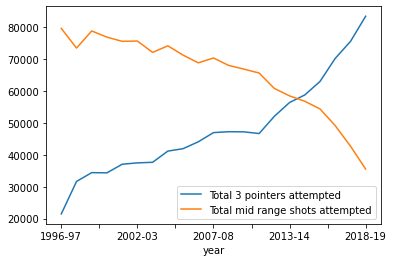

In [17]:
df82_total_shot.plot.line()

<AxesSubplot:xlabel='year'>

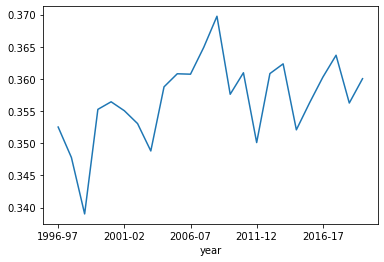

In [18]:
dftotal3["Total 3 pointers percentage"].plot.line()

<span style="font-size:2em;">Shot Takers</span>

In [19]:
position3_df = pd.read_csv("Seasons_Stats.csv")

In [20]:
position3_df = position3_df[position3_df.Year > 1979]

position3_df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5727,5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
5728,5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
5729,5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
5730,5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5731,5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [21]:
position3_df["Pos"].value_counts()

PF       3945
C        3765
PG       3753
SG       3691
SF       3572
PG-SG      28
SF-SG      27
C-PF       26
SG-SF      25
SG-PG      25
PF-C       23
PF-SF      22
SF-PF      20
SG-PF       3
C-SF        1
PG-SF       1
Name: Pos, dtype: int64

In [22]:
position3_df["Pos"] = position3_df["Pos"].str[:2]

In [23]:
position3_df["Pos"].value_counts()

PF    3990
PG    3782
C     3765
SG    3744
SF    3619
C-      27
Name: Pos, dtype: int64

In [24]:
position3_df["Pos"].replace({"C-": "C"}, inplace=True)

In [25]:
seasons_dfs = []
season = 1980

while season <= 2017:
    df = position3_df[position3_df["Year"] == season]
    seasons_dfs.append(df)
    season+=1

In [26]:
seasons_dfs[2]

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
6449,6449,1982.0,Kareem Abdul-Jabbar*,C,34.0,LAL,76.0,76.0,2677.0,23.4,...,0.706,172.0,487.0,659.0,225.0,63.0,207.0,230.0,224.0,1818.0
6450,6450,1982.0,Alvan Adams,C,27.0,PHO,79.0,75.0,2393.0,18.6,...,0.781,138.0,448.0,586.0,356.0,114.0,78.0,196.0,269.0,1196.0
6451,6451,1982.0,Mark Aguirre,SF,22.0,DAL,51.0,20.0,1468.0,17.3,...,0.680,89.0,160.0,249.0,164.0,37.0,22.0,135.0,152.0,955.0
6452,6452,1982.0,Danny Ainge,SG,22.0,BOS,53.0,1.0,564.0,10.1,...,0.862,25.0,31.0,56.0,87.0,37.0,3.0,53.0,86.0,219.0
6453,6453,1982.0,Tiny Archibald*,PG,33.0,BOS,68.0,51.0,2167.0,14.3,...,0.747,25.0,91.0,116.0,541.0,52.0,3.0,178.0,131.0,858.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,6817,1982.0,Mike Woodson,SG,23.0,KCK,76.0,74.0,2186.0,17.8,...,0.780,97.0,137.0,234.0,206.0,135.0,33.0,144.0,199.0,1221.0
6818,6818,1982.0,Orlando Woolridge,SF,22.0,CHI,75.0,12.0,1188.0,13.4,...,0.699,82.0,145.0,227.0,81.0,23.0,24.0,107.0,152.0,548.0
6819,6819,1982.0,Sam Worthen,PG,24.0,UTA,5.0,0.0,22.0,1.9,...,NaN,1.0,0.0,1.0,3.0,0.0,0.0,2.0,3.0,4.0
6820,6820,1982.0,Larry Wright,PG,27.0,DET,1.0,0.0,6.0,-17.2,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0


In [27]:

clean_df = []


for df in seasons_dfs:
    df["Player"] = df["Player"].drop_duplicates()
    df = df[df['Player'].notna()]
    clean_df.append(df)
    
    

<ipython-input-27-1fdee31cb844>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Player"] = df["Player"].drop_duplicates()


In [28]:
total_clean_df = pd.concat(clean_df, ignore_index=True)

In [29]:
total_clean_df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
1,5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
2,5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
3,5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
4,5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15515,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
15516,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
15517,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
15518,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [30]:
position3_df["Pos"].value_counts()
position3_df.groupby("Pos")["3PA"].sum()



Pos
C      27274.0
PF    133992.0
PG    349629.0
SF    300180.0
SG    392767.0
Name: 3PA, dtype: float64

In [31]:


#df80s = position3_df.loc[position3_df["Year"].str.contains("198")]

position3_df['Year'] = position3_df['Year'].astype(str)

df80s = position3_df.loc[position3_df["Year"].str.contains("198")]#3 point line introduced in 1980

df90s = position3_df.loc[position3_df["Year"].str.contains("199")]

df00s = position3_df.loc[position3_df["Year"].str.contains("200")]

df10s = position3_df.loc[position3_df["Year"].str.contains("201")]



Pos
C      1810.0
PF     5521.0
PG    24087.0
SF    13291.0
SG    25913.0
Name: 3PA, dtype: float64

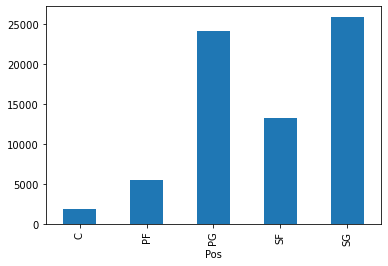

In [32]:
df80s.groupby("Pos")["3PA"].sum().plot.bar()
df80s.groupby("Pos")["3PA"].sum()

Pos
C      5183.0
PF    19915.0
PG    85831.0
SF    66377.0
SG    91197.0
Name: 3PA, dtype: float64

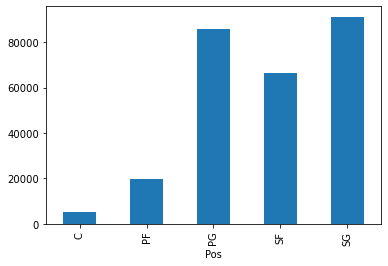

In [33]:
df90s.groupby("Pos")["3PA"].sum().plot.bar()
df90s.groupby("Pos")["3PA"].sum()

Pos
C       7999.0
PF     50756.0
PG    120341.0
SF    102424.0
SG    130980.0
Name: 3PA, dtype: float64

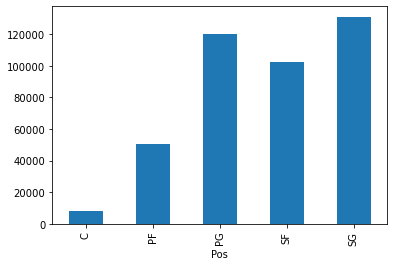

In [34]:
df00s.groupby("Pos")["3PA"].sum().plot.bar()
df00s.groupby("Pos")["3PA"].sum()

Pos
C      12282.0
PF     57800.0
PG    119370.0
SF    118088.0
SG    144677.0
Name: 3PA, dtype: float64

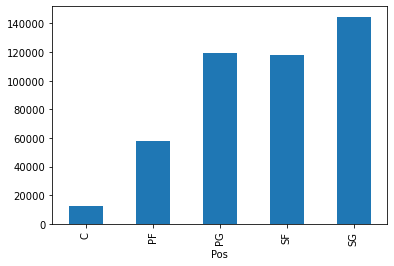

In [35]:
df10s.groupby("Pos")["3PA"].sum().plot.bar()
df10s.groupby("Pos")["3PA"].sum()


In [36]:
from nba_api.stats.endpoints import shotchartleaguewide
season = '2019-20'
shot = shotchartleaguewide.ShotChartLeagueWide(league_id= "00", season = '2019-20')#only goes back to 1996
df3 = shot.get_data_frames()[0]#make an array of ShotChartLeagueWide objects?

shotseasons

df3[df3['SHOT_ZONE_BASIC'].str.contains("3")]

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,46,6,0.130
1,League Averages,Above the Break 3,Center(C),24+ ft.,16180,5602,0.346
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,22539,8051,0.357
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,21167,7396,0.349
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,9185,3660,0.398
19,League Averages,Right Corner 3,Right Side(R),24+ ft.,8635,3279,0.380


<span style="font-size:2em;">The Champions</span>

In [37]:
from nba_api.stats.endpoints import leaguedashteamstats

champion_name = ["Chicago Bulls", "Chicago Bulls", "San Antonio Spurs",
                 "Los Angeles Lakers", "Los Angeles Lakers", "Los Angeles Lakers",
                 "San Antonio Spurs", "Detroit Pistons", "San Antonio Spurs",
                 "Miami Heat", "San Antonio Spurs", "Boston Celtics", 
                 "Los Angeles Lakers", "Los Angeles Lakers", "Dallas Mavericks",
                 "Miami Heat", "Miami Heat", "San Antonio Spurs", "Golden State Warriors",
                 "Cleveland Cavaliers", "Golden State Warriors", "Golden State Warriors", 
                 "Toronto Raptors", "Los Angeles Lakers","Milwaukee Bucks"]


In [38]:
i = 1996

playoffs_df = []

while i < 2020:
    year = str(i) + "-" + str(i+1)[2:]
    leaguestats = leaguedashteamstats.LeagueDashTeamStats(season_type_all_star='Playoffs', season=year)
    playoffs_df.append(leaguestats)
    time.sleep(1)
    i+=1

In [39]:
filtered_playoffs_df = []

for frame in playoffs_df:
    temp = frame.get_data_frames()[0]
    temp = temp.filter(["TEAM_NAME","FG3M", "FG3A"], axis=1)
    filtered_playoffs_df.append(temp)
    

filtered_playoffs_df[1]

,TEAM_NAME,FG3M,FG3A
0,Atlanta Hawks,27,72
1,Charlotte Hornets,32,100
2,Chicago Bulls,88,272
3,Cleveland Cavaliers,7,24
4,Houston Rockets,24,93
5,Indiana Pacers,87,232
6,Los Angeles Lakers,78,227
7,Miami Heat,36,100
8,Minnesota Timberwolves,37,98
9,New Jersey Nets,7,22


In [40]:
just_champs_df = []
index = 0

for frame in filtered_playoffs_df:
    filt = frame[frame["TEAM_NAME"] == champion_name[index]]
    index+=1
    just_champs_df.append(filt)
    
total_just_champs = pd.concat(just_champs_df)

total_just_champs = total_just_champs.set_index("TEAM_NAME") #TODO graphs

<AxesSubplot:xlabel='TEAM_NAME'>

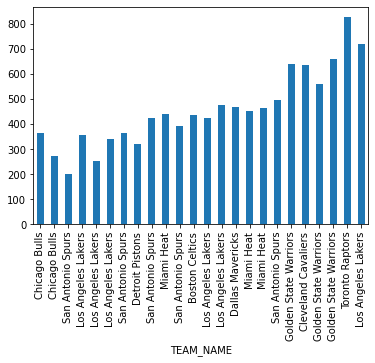

In [41]:
total_just_champs["FG3A"].plot.bar()

<span style="font-size:2em;">Position Predictor</span>

In [42]:
position3_df['Year'] = position3_df['Year'].astype(float)

In [43]:
position3_df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5727,5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
5728,5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
5729,5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
5730,5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5731,5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [44]:
total_clean_df["Pos"].replace({"PG": 1, "SG": 2, "SF": 3, "PF": 4, "C": 5}, inplace=True)

In [45]:
total_clean_df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,5727,1980.0,Kareem Abdul-Jabbar*,5,32.0,LAL,82.0,NaN,3143.0,25.3,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
1,5728,1980.0,Tom Abernethy,4,25.0,GSW,67.0,NaN,1222.0,11.0,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
2,5729,1980.0,Alvan Adams,5,25.0,PHO,75.0,NaN,2168.0,19.2,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
3,5730,1980.0,Tiny Archibald*,1,31.0,BOS,80.0,80.0,2864.0,15.3,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
4,5731,1980.0,Dennis Awtrey,5,31.0,CHI,26.0,NaN,560.0,7.4,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15515,24686,2017.0,Cody Zeller,4,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
15516,24687,2017.0,Tyler Zeller,5,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
15517,24688,2017.0,Stephen Zimmerman,5,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
15518,24689,2017.0,Paul Zipser,3,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [46]:
relevant_clean_df = total_clean_df.filter(["Year", "Pos", "FG%", "3PA", "3P%", "FT%", "ORB", "DRB",
                         "TRB", "AST", "STL", "BLK", "PTS"], axis=1)

In [47]:
import numpy as np

relevant_clean_df.isnull().values.any()

True

In [48]:
 
pd.set_option('display.max_rows', 20)    
nulls = relevant_clean_df.apply(lambda x: sum(x.isnull()), axis = 0)
display(nulls)



Year       0
Pos        0
FG%       44
3PA        0
3P%     2568
FT%      416
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
PTS        0
dtype: int64

In [49]:
pd.reset_option('display.max_rows')

In [50]:
#Drop 3 point percentage column, drop rows without fg% or ft%. found out that if you don't attempt any of the percentage
#stats then it will be marked as NaN

relevant_clean_df=relevant_clean_df.drop(["3P%"], axis=1)

relevant_clean_df.dropna(subset=["FG%", "FT%"])


,Year,Pos,FG%,3PA,FT%,ORB,DRB,TRB,AST,STL,BLK,PTS
0,1980.0,5,0.604,1.0,0.765,190.0,696.0,886.0,371.0,81.0,280.0,2034.0
1,1980.0,4,0.481,1.0,0.683,62.0,129.0,191.0,87.0,35.0,12.0,362.0
2,1980.0,5,0.531,2.0,0.797,158.0,451.0,609.0,322.0,108.0,55.0,1118.0
3,1980.0,1,0.482,18.0,0.830,59.0,138.0,197.0,671.0,106.0,10.0,1131.0
4,1980.0,5,0.450,0.0,0.640,29.0,86.0,115.0,40.0,12.0,15.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15515,2017.0,4,0.571,1.0,0.679,135.0,270.0,405.0,99.0,62.0,58.0,639.0
15516,2017.0,5,0.494,1.0,0.564,43.0,81.0,124.0,42.0,7.0,21.0,178.0
15517,2017.0,5,0.323,0.0,0.600,11.0,24.0,35.0,4.0,2.0,5.0,23.0
15518,2017.0,3,0.398,99.0,0.775,15.0,110.0,125.0,36.0,15.0,16.0,240.0


In [51]:
relevant_clean_df = relevant_clean_df.dropna(subset=["FG%", "FT%"])

In [52]:
relevant_clean_df.apply(lambda x: sum(x.isnull()), axis = 0)#check how many nulls per column

Year    0
Pos     0
FG%     0
3PA     0
FT%     0
ORB     0
DRB     0
TRB     0
AST     0
STL     0
BLK     0
PTS     0
dtype: int64

In [53]:
relevant_clean_df = relevant_clean_df.set_index("Year")

In [54]:

relevant_clean_df_00s = relevant_clean_df.loc[:2000.0]

In [55]:
relevant_clean_df_00s["Pos"].value_counts()

4    1610
5    1508
3    1490
2    1489
1    1438
Name: Pos, dtype: int64

In [56]:
#training data for 2000's

X_train = relevant_clean_df_00s[["FG%", "3PA", "FT%", "ORB", "DRB",
                         "TRB", "AST", "STL", "BLK", "PTS"]]
x_new = pd.Series()


<ipython-input-56-225e16c72722>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x_new = pd.Series()


In [57]:
#Allen Iverson 2001-2002

x_new = pd.Series()

x_new["FG%"] = 0.398
x_new["3PA"] = 89.0
x_new["FT%"] = 0.812
x_new["ORB"] = 44.0
x_new["DRB"] = 225.0
x_new["TRB"] = 269.0
x_new["AST"] = 331.0
x_new["STL"] = 168.0
x_new["BLK"] = 13.0
x_new["PTS"] = 1883.0

<ipython-input-57-5ada9433f484>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x_new = pd.Series()


In [58]:
#Kobe

x_new["FG%"] = 0.459
x_new["3PA"] = 415.0
x_new["FT%"] = 0.840 
x_new["ORB"] = 94.0
x_new["DRB"] = 423.0
x_new["TRB"] = 517.0
x_new["AST"] = 441.0
x_new["STL"] = 151.0
x_new["BLK"] = 40.0
x_new["PTS"] = 2323.0

In [59]:
#Yao Ming 2008-2009


x_new["FG%"] = 0.548
x_new["3PA"] = 1.0
x_new["FT%"] = 0.866 
x_new["ORB"] = 204.0
x_new["DRB"] = 557.0
x_new["TRB"] = 761.0
x_new["AST"] = 137.0
x_new["STL"] = 30.0
x_new["BLK"] = 150.0
x_new["PTS"] = 1514.0

In [60]:
#Dirk 2008-2009

x_new["FG%"] = 0.479
x_new["3PA"] = 170.0
x_new["FT%"] = 0.890 
x_new["ORB"] = 88.0
x_new["DRB"] = 593.0
x_new["TRB"] = 681.0
x_new["AST"] = 197.0
x_new["STL"] = 61.0
x_new["BLK"] = 63.0
x_new["PTS"] = 2094.0

In [61]:
#Shane Battier 2008-2009

x_new["FG%"] = 0.410
x_new["3PA"] = 237.0
x_new["FT%"] = 0.821 
x_new["ORB"] = 52.0
x_new["DRB"] = 233.0
x_new["TRB"] = 285.0
x_new["AST"] = 137.0
x_new["STL"] = 48.0
x_new["BLK"] = 54.0
x_new["PTS"] = 436.0

In [62]:
#Steve Nash 2004-2005

x_new["FG%"] = 0.502
x_new["3PA"] = 218.0
x_new["FT%"] = 0.887 
x_new["ORB"] = 57.0
x_new["DRB"] = 192.0
x_new["TRB"] = 249.0
x_new["AST"] = 861.0
x_new["STL"] = 74.0
x_new["BLK"] = 6.0
x_new["PTS"] = 1165.0

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

# Standardize the training and test data
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_new_st = scaler.transform(pd.DataFrame([x_new])) # needs to be a DataFrame
y_train = relevant_clean_df_00s["Pos"]

# Fit k-nearest neighbors
model = KNeighborsClassifier(n_neighbors=87)# square root of training data. Conveniently an odd number
model.fit(X=X_train_st, y=y_train)
model.predict(X=X_new_st)

array([1])

In [64]:
model.predict_proba(X=X_new_st)

array([[0.96551724, 0.03448276, 0.        , 0.        , 0.        ]])